# Colour Temperature & Correlated Colour Temperature

The [colour temperature](http://en.wikipedia.org/wiki/Color_temperature) noted $T_c$ is the temperature of a Planckian radiator whose radiation has the same chromaticity as that of a given stimulus. <a name="back_reference_1"></a><a href="#reference_1">[1]</a>

The [correlated colour temperature](http://en.wikipedia.org/wiki/Color_temperature#Correlated_color_temperature) noted $T_{cp}$ and shortened to $CCT$ is the temperature of the Planckian radiator having the chromaticity nearest the chromaticity associated with the given spectral distribution on a diagram where the (CIE 1931 2° Standard Observer based) $u^\prime, \cfrac{2}{3}v^\prime$ coordinates of the Planckian locus and the test stimulus are depicted. <a name="back_reference_2"></a><a href="#reference_2">[2]</a>

The *CIE Standard Illuminant A*, *CIE Standard Illuminant D65* and *CIE Illuminant E* illuminants plotted in the *CIE 1960 UCS Chromaticity Diagram*:

In [1]:
%matplotlib inline

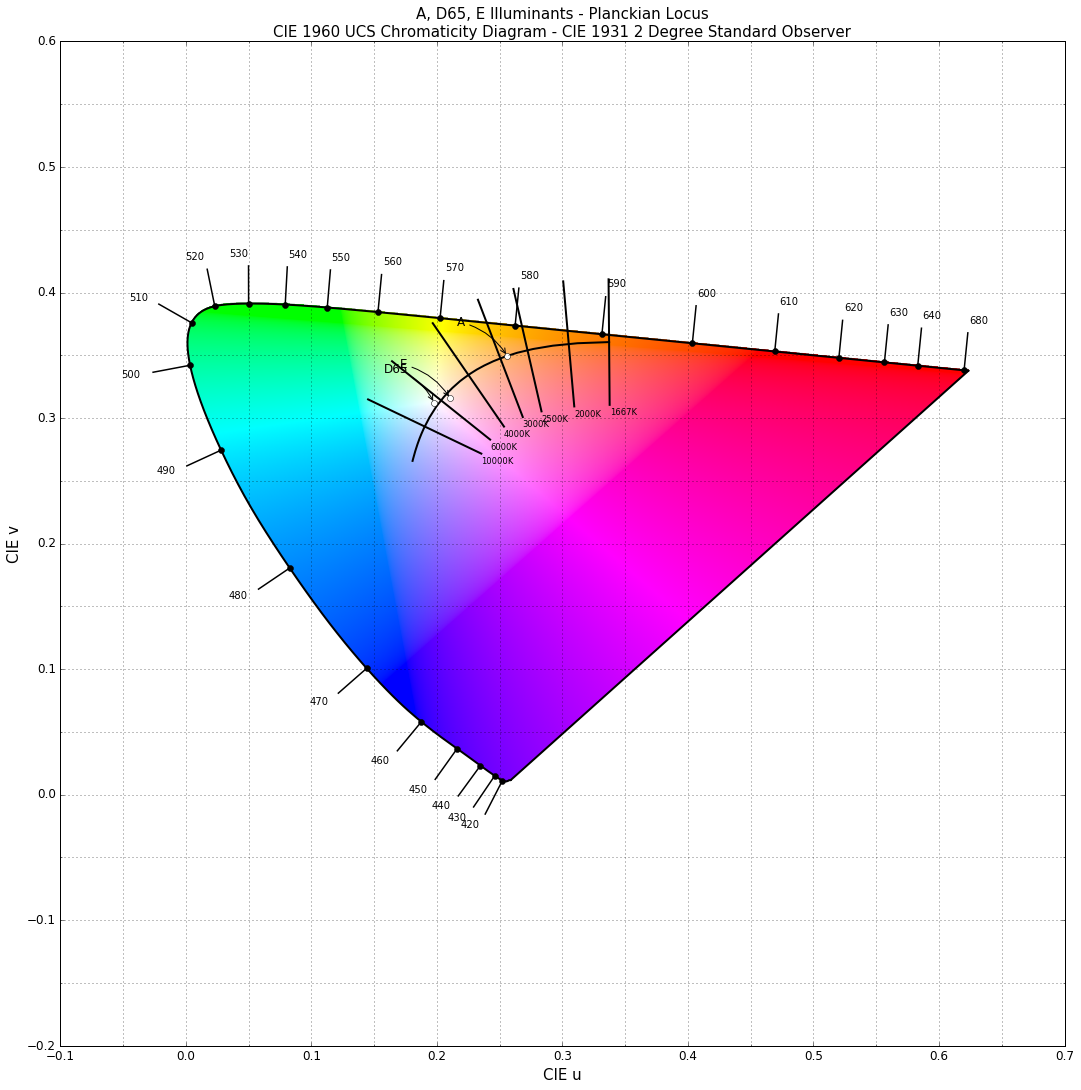

In [2]:
import colour
from colour.plotting import *

planckian_locus_CIE_1960_UCS_chromaticity_diagram_plot(['A', 'D65', 'E'])

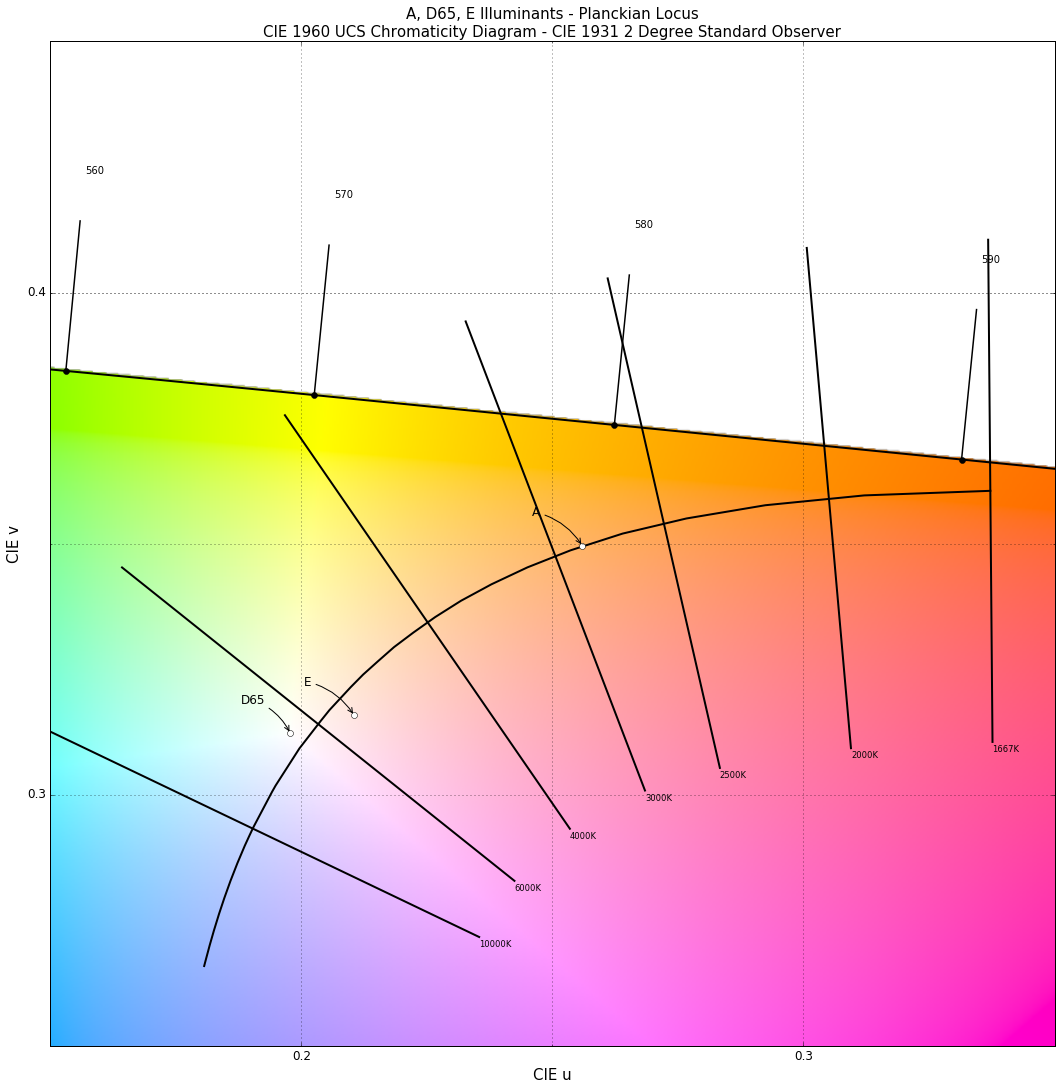

In [3]:
# Zooming into the *Planckian Locus*.
planckian_locus_CIE_1960_UCS_chromaticity_diagram_plot(
    ['A', 'D65', 'E'], bounding_box=[0.15, 0.35, 0.25, 0.45])

The concept of correlated colour temperature should not be used if the chromaticity of the test source differs more than $\Delta C=5\cdot10^{-2}$ from the Planckian radiator with: <a name="back_reference_2"></a><a href="#reference_2">[2]</a>

$$
\Delta C= \Biggl[ \Bigl(u_t^\prime-u_p^\prime\Bigr)^2+\cfrac{4}{9}\Bigl(v_t^\prime-v_p^\prime\Bigr)^2\Biggr]^{1/2}
$$

where $u_t^\prime$, $u_p^\prime$ refer to the test source, $v_t^\prime$, $v_p^\prime$ to the Planckian radiator.

[Colour](https://github.com/colour-science/colour/) implements various methods for correlated colour temperature computation $T_{cp}$ from chromaticity coordinates $xy$ or $uv$ and chomaticity coordinates $xy$ or $uv$ computation from correlated colour temperature:

* Robertson (1968) correlated colour temperature $T_{cp}$ and $D_{uv}$ computation method by interpolation between isotemperature lines.
* Ohno (2013) correlated colour temperature $T_{cp}$ and $D_{uv}$ computation method by direct approach and combined triangular and parabolic solutions.
* McCamy (1992) correlated colour temperature $T_{cp}$ cubic approximation computation method.
* Hernandez-Andres, Lee and Romero (1999) correlated colour temperature $T_{cp}$ cubic approximation computation method.
* Kang et al. (2002) chomaticity coordinates $xy$ cubic approximation computation method.
* *CIE Illuminant D Series* chomaticity coordinates $xy$ computation method.

## Robertson (1968) Method

Robertson (1968) method is based on $T_{cp}$ computation by linear interpolation between two adjacent members of a defined set of 31 isotemperature lines. <a name="back_reference_3"></a><a href="#reference_3">[3]</a>

In the *CIE 1960 UCS chromaticity diagram* the distance $d_i$ of the chromaticity point of given source ($u_s$, $v_s$) from each of the chromaticity point ($u_i$, $v_i$) through which the $i$th isotemperature line of slope $t_i$ passes is calculated as follows: <a name="back_reference_3"></a><a href="#reference_3">[3]</a>

$$
\begin{equation}
d_i=\cfrac{(v_s-v_i)-t_i(u_s-u_i)}{(1+t_i^2)^{1/2}}
\end{equation}
$$

The chromaticity point ($u_s$, $v_s$) is located between the adjacent isotemperature lines $j$ and $j + 1$ if $d_j/d_{j+1} < 0$

$$
\begin{equation}
T_c=\Biggl[\cfrac{1}{T_j}+\cfrac{\theta_1}{\theta_1+\theta_2}\biggl(\cfrac{1}{T_{j+1}}-\cfrac{1}{T_j}\biggr)\Biggr]^{-1}
\end{equation}
$$

where $\theta_1$ and $\theta_2$ are respectively the angles between the isotemperature lines $T_j$ and $T_{j+1}$ and the line joining ($u_s$, $v_s$) to their intersection. Since the isotemperature lines are narrow spaced $\theta_1$ and $\theta_2$ are small enough that one can set $\theta_1/\theta_2 = \sin\theta_1/\sin\theta_2$. The above equation can then be written:

$$
\begin{equation}
T_c=\Biggl[\cfrac{1}{T_j}+\cfrac{d_j}{d_j-d_{j+1}}\biggl(\cfrac{1}{T_{j+1}}-\cfrac{1}{T_j}\biggr)\Biggr]^{-1}
\end{equation}
$$

The *colour.uv_to_CCT_Robertson1968* definition is used to calculate the correlated colour temperature $T_{cp}$ and distance $D_{uv}$ ($d_i$):

In [4]:
colour.uv_to_CCT_Robertson1968((0.19783451566098664, 0.31221744678060825))

array([  6.50303994e+03,   3.25561654e-03])

*colour.uv_to_CCT* definition is implemented as a wrapper for various correlated colour temperature computation methods:

In [5]:
colour.uv_to_CCT((0.19783451566098664, 0.31221744678060825), 'Robertson 1968')

array([  6.50303994e+03,   3.25561654e-03])

> Note: *'robertson1968'* is defined as a convenient alias for *'Robertson 1968'*:

In [6]:
colour.uv_to_CCT((0.19783451566098664, 0.31221744678060825), 'robertson1968')

array([  6.50303994e+03,   3.25561654e-03])

Converting from correlated colour temperature $T_{cp}$ and distance $D_{uv}$ to chomaticity coordinates $uv$:

In [7]:
colour.CCT_to_uv(6503.03994225557, 0.0032556165414977167, 'Robertson 1968')

array([ 0.19783447,  0.31221739])

In [8]:
colour.CCT_to_uv(6503.03994225557, 0.0032556165414977167, 'robertson1968')

array([ 0.19783447,  0.31221739])

## Ohno (2013) Method

Ohno (2013) presented new practical accurate methods to calculate the correlated colour temperature $T_{cp}$ and distance $D_{uv}$ with an error of 1 $K$ in $T_{cp}$ range from 1000 to 20,000 and $\pm$0.03 in $D_{uv}$. <a name="back_reference_4"></a><a href="#reference_4">[4]</a>

### Triangular Solution

The correlated colour temperature is calculated by searching the closest point on the Planckian locus on the *CIE 1960 UCS chromaticity diagram* but without the complexity of Roberston (1968) method.

A table of coordinates ($U_i$, $V_i$) of Planckian locus (Planckian ($u$, $v$) table) in the estimated range of correlated colour temperature needed is generated and then the distance $d_i$ from the chromaticity coordinates ($U_x$, $V_x$) of a test light source is calculated.

The point $i = m$ is the point where $d_i$ is the smallest in the table ensuring that the correlated colour temperature to be obtained lies between $T_{m-1}$ and $T_{m+1}$.

The previous computation is repeated $n$ times through cascade expansion in order to reduce errors.

A triangle is then formed by the chromaticity point ($U_x$, $V_x$) of the test light soure and the chromaticity points on Planckian locus at $T_{m-1}$ and $T_{m+1}$. The blackbody temperature $T_x$ for the closest point to the line between $T_{m-1}$ and $T_{m+1}$ is calculated as follows: <a name="back_reference_4"></a><a href="#reference_4">[4]</a>

$$
\begin{equation}
T_x=T_{m-1}+(T_{m+1}-T_{m-1})\cdot\cfrac{x}{l}
\end{equation}
$$

with

$$
\begin{equation}
\begin{aligned}
x&=\cfrac{d_{m-1}^2-d_{m+1}^2+l^2}{2l}\\
l&=\sqrt{(u_{m+1}-u_{m-1})^2+(v_{m+1}-v_{m-1})^2}
\end{aligned}
\end{equation}
$$

$D_{uv}$ is then calculated as follows:

$$
\begin{equation}
D_{uv}=(d_{m-1}^2-x^2)^{1/2}\cdot sgn(v_x-v_{T_x})
\end{equation}
$$

with

$$
\begin{equation}
\begin{aligned}
v_{T_x}&=v_{m-1}+\{v_{m+1}-v_{m-1}\}\cdot x/l\\
SIGN(z)&=1\ for\ z \geq0\ and\ SIGN(z)=-1\ for\ z <0
\end{aligned}
\end{equation}
$$

Errors due to the non linearity of the correlated colour temperature scale on ($u$, $v$) coordinates are reduced by applying the following correction:

$$
\begin{equation}
T_{x,cor}=T_x\times 0.99991
\end{equation}
$$

This correction is not needed for Planckian ($u$, $v$) table with steps of 0.25% or smaller.

### Parabolic Solution

After finding $T_{m-1}$ and $T_{m+1}$ as described in the [triangular solution](#Triangular-Solution) method above, $d_{m−1}$, $d_m$, $d_{m+1}$ are fitted to a parabolic function. The polynomial is derived from $d_{m−1}$, $d_m$, $d_{m+1}$ and $T_{m−1}$, $T_m$, $T_{m+1}$ as: <a name="back_reference_4"></a><a href="#reference_4">[4]</a>

$$
\begin{equation}
d(T)=aT^2+bT+c
\end{equation}
$$

where

$$
\begin{equation}
\begin{aligned}
a&\ =[T_{m-1}(d_{m+1}-d_m)+T_m(d_{m-1}-d_{m+1})+T_{m+1}(d_m-d_{m-1})]\cdot X^{-1}\\
b&\ =-[T_{m-1}^2(d_{m+1}-d_m)+T_m^2(d_{m-1}-d_{m+1})+T_{m+1}^2(d_m-d_{m-1})]\cdot X^{-1}\\
c&\ =-[d_{m-1}(T_{m+1}-T_m)\cdot T_m\cdot T_{m+1}+d_m(T_{m-1}-T_{m+1})\cdot T_{m-1}\cdot T_{m+1}+d_{m+1}(T_m-T_{m-1})\cdot T_{m-1}\cdot T_m]\cdot X^{-1}
\end{aligned}
\end{equation}
$$

with

$$
\begin{equation}
X=(T_{m+1}-T_m)(T_{m-1}-T_{m+1})(T_m-T_{m-1})
\end{equation}
$$

The correlated colour temperature $T=T_x$ is then obtained as follows:

$$
\begin{equation}
T_X=-\cfrac{b}{2a}\qquad\because d^\prime(T)=2aT_x+b=0
\end{equation}
$$

The correction factor $T_{x,cor}$ for nonlinearity is applied as described in the [triangular solution](#Triangular-Solution) method.

$D_{uv}$ is then calculated as follows:

$$
\begin{equation}
D_{uv}=SIGN(v_x-v_{T_x})\cdot(aT_{x,cor}^2+bT_{x,cor}+c)
\end{equation}
$$

with

$$
\begin{equation}
SIGN(z)=1\ for\ z \geq0\ and\ SIGN(z)=-1\ for\ z <0
\end{equation}
$$

### Combined Solution

The parabolic solution works accurately except in on or near the Planckian locus. Taking triangular solution results for $|D_{uv}| < 0.002$ and the parabolic solution results for other regions solves that problem. <a name="back_reference_4"></a><a href="#reference_4">[4]</a>

The *colour.uv_to_CCT_Ohno2013* definition is used to calculate the correlated colour temperature $T_{cp}$ and distance $D_{uv}$ ($d_i$):

In [9]:
colour.uv_to_CCT_Ohno2013((0.19783451566098664, 0.31221744678060825))

array([  6.50357118e+03,   3.20564663e-03])

Precision can be changed by passing a value to the *iterations* argument:

In [10]:
for i in range(10):
    print(colour.uv_to_CCT_Ohno2013((0.19783451566098664, 0.31221744678060825), iterations=i + 1))

[  2.10385778e+04   3.13442793e-02]
[  7.39335170e+03   6.08295728e-03]
[  6.53686245e+03   3.29413192e-03]
[  6.50525022e+03   3.21084365e-03]
[  6.50358045e+03   3.20588923e-03]
[  6.50357118e+03   3.20564663e-03]
[  6.50362861e+03   3.20563660e-03]
[  6.50365124e+03   3.20563612e-03]
[  6.50364819e+03   3.20563609e-03]
[  6.50364706e+03   3.20563609e-03]


Using the *colour.uv_to_CCT* wrapper definition:

In [11]:
colour.uv_to_CCT((0.19783451566098664, 0.31221744678060825), 'Ohno 2013')

array([  6.50357118e+03,   3.20564663e-03])

> Note: *'ohno2013'* is defined as a convenient alias for *'Ohno 2013'*:

In [12]:
colour.uv_to_CCT((0.19783451566098664, 0.31221744678060825), 'ohno2013')

array([  6.50357118e+03,   3.20564663e-03])

Converting from correlated colour temperature $T_{cp}$ and distance $D_{uv}$ to chomaticity coordinates $uv$:

In [13]:
colour.CCT_to_uv(6503.03994225557, 0.0032556165414977167, 'Ohno 2013')

array([ 0.19779726,  0.31225121])

In [14]:
colour.CCT_to_uv(6503.03994225557, 0.0032556165414977167, 'ohno2013')

array([ 0.19779726,  0.31225121])

## McCamy (1992) Method

McCamy (1992) proposed an equation to compute correlated colour temperature $T_{cp}$ from *CIE 1931 2° Standard Observer* chromaticity coordinates $x$, $y$ by using a chromaticity epicenter ($x_e$, $y_e$) where the isotemperature lines in some of the correlated colour temperature range converge and the inverse slope of the line $n$ that connects it to $x$, $y$. <a name="back_reference_5"></a><a href="#reference_5">[5]</a>

The cubic approximation equation is defined as follows: <a name="back_reference_5"></a><a href="#reference_5">[5]</a>

$$
\begin{equation}
T_{cp}=-449n^3+3525n^2-6823.3n+5520.33
\end{equation}
$$

where

$$
\begin{equation}
n=\cfrac{x-x_e}{y-ye}\\
x_e=0.3320\qquad y_e=0.1858
\end{equation}
$$

The *colour.xy_to_CCT_mccamy* definition is used to calculate the correlated colour temperature $T_{cp}$ from *CIE 1931 2° Standard Observer* chromaticity coordinates $x$, $y$:

In [15]:
colour.xy_to_CCT_McCamy1992((0.31271, 0.32902))

6504.3893830489724

The *colour.xy_to_CCT* definition is implemented as a wrapper for various correlated colour temperature computation methods from *CIE 1931 2° Standard Observer* chromaticity coordinates $x$, $y$:

In [16]:
colour.xy_to_CCT((0.31271, 0.32902), 'McCamy 1992')

6504.3893830489724

> Note: *'mccamy1992'* is defined as a convenient alias for *'McCamy 1992'*:

In [17]:
colour.xy_to_CCT((0.31271, 0.32902), 'mccamy1992')

6504.3893830489724

## Hernandez-Andres, Lee and Romero (1999) Method

Hernandez-Andres, Lee and Romero (1999) extended McCamy (1992) work by using a second epicenter to extend the accuracy over a wider correlated colour temperature and chromaticity coordinates range ($3000$–$10^6K$). <a name="back_reference_6"></a><a href="#reference_6">[6]</a>

The new extended equation to calculate the correlated colour temperature $T_{cp}$ is defined as follows: <a name="back_reference_6"></a><a href="#reference_6">[6]</a>

$$
\begin{equation}
T_{cp}=A_0+A_1exp(-n/t_1)+A_2exp(-n/t_2)+A_3exp(-n/t_3)
\end{equation}
$$

where

$$
\begin{equation}
n=\cfrac{x-x_e}{y-ye}\\
\end{equation}
$$

with

| Constants | $T_{cp}$ Range ($K$) $3000$-$50,000$ | $T_{cp}$ Range ($K$) $50,000$-$8\times10^5$ |
|:---------:|:------------------------------------:|:-------------------------------------------:|
| $A_0$     | $-949.86315$                         | $36284.48953$                               |
| $A_1$     | $6253.80338$                         | $0.00228$                                   |
| $t_1$     | $0.92159$                            | $0.07861$                                   |
| $A_2$     | $28.70599$                           | $5.4535\times10^{-36}$                      |
| $t_2$     | $0.20039$                            | $0.01543$                                   |
| $A_3$     | $0.00004$                            |                                             |
| $t_3$     | $0.07125$                            |                                             |
| $x_e$     | $0.3366$                             | $0.3356$                                    |
| $y_e$     | $0.1735$                             | $0.1691$                                    |

The *colour.xy_to_CCT_hernandez* definition is used to calculate the correlated colour temperature $T_{cp}$ from *CIE 1931 2° Standard Observer* chromaticity coordinates $x$, $y$:

In [18]:
colour.xy_to_CCT_Hernandez1999((0.31271, 0.32902))

6500.0421533365825

Using the *colour.xy_to_CCT* wrapper definition:

In [19]:
colour.xy_to_CCT((0.31271, 0.32902), 'Hernandez 1999')

6500.0421533365825

> Note: *'hernandez1999'* is defined as a convenient alias for *'Hernandez 1999'*:

In [20]:
colour.xy_to_CCT((0.31271, 0.32902), 'hernandez1999')

6500.0421533365825

## Kang et al. (2002) Method

Kang et al. (2002) proposed an advanced colour-temperature control system for HDTV applications in the range from $1667K$ to $25000K$. <a name="back_reference_7"></a><a href="#reference_7">[7]</a>

The *CIE 1931 2° Standard Observer* chromaticity coordinates $x$, $y$ are given by the following equations: <a name="back_reference_7"></a><a href="#reference_7">[7]</a>

$$
\begin{equation}
\begin{aligned}
x&\ =\begin{cases}-0.2661239\cfrac{10^9}{T_{cp}^3}-0.2343589\cfrac{10^6}{T_{cp}^2}+0.8776956\cfrac{10^3}{T_{cp}}+0.179910 & for\ 1667K\leq T_{cp}\leq4000k\\
-3.0258469\cfrac{10^9}{T_{cp}^3}+2.1070379\cfrac{10^6}{T_{cp}^2}+0.2226347\cfrac{10^3}{T_{cp}}+0.24039 & for\ 4000K\leq T_{cp}\leq25000k\end{cases}\\
y&\ =\begin{cases}-1.1063814x^3-1.34811020x^2+2.18555832x-0.20219683 & for\ 1667K\leq T_{cp}\leq2222k\\
-0.9549476x^3-1.37418593x^2+2.09137015x-0.16748867 & for\ 2222K\leq T_{cp}\leq4000k\\
3.0817580x^3-5.8733867x^2+3.75112997x-0.37001483 & for\ 4000K\leq T_{cp}\leq25000k\end{cases}
\end{aligned}
\end{equation}
$$

The *colour.CCT_to_xy_kang* definition is used to calculate the *CIE 1931 2° Standard Observer* chromaticity coordinates $x$, $y$ from correlated colour temperature $T_{cp}$:

In [21]:
colour.CCT_to_xy_Kang2002(6504.389383048972)

array([ 0.313426  ,  0.32359597])

The *colour.CCT_to_xy* definition is implemented as a wrapper for various *CIE 1931 2° Standard Observer* chromaticity coordinates $x$, $y$ computation from correlated colour temperature:

In [22]:
colour.CCT_to_xy(6504.389383048972, 'Kang 2002')

array([ 0.313426  ,  0.32359597])

> Note: *'kang2002'* is defined as a convenient alias for *'Kang 2002'*:

In [23]:
colour.CCT_to_xy(6504.389383048972, 'kang2002')

array([ 0.313426  ,  0.32359597])

## *CIE Illuminant D Series* Method

Judd et al. (1964) defined the following equations to calculate the *CIE 1931 2° Standard Observer* chromaticity coordinates $x_D$, $y_D$ of a *CIE Illuminant D Series*: <a name="back_reference_8"></a><a href="#reference_8">[8]</a>

$$
\begin{equation}
\begin{aligned}
x_D&\ =\begin{cases}-4,6070\cfrac{10^9}{T_{cp}^3}+2.9678\cfrac{10^6}{T_{cp}^2}+0.09911\cfrac{10^3}{T_{cp}}+0.244063 & for\ 4000K\leq T_{cp}\leq7000k\\
-2.0064\cfrac{10^9}{T_{cp}^3}+1.9018\cfrac{10^6}{T_{cp}^2}+0.24748\cfrac{10^3}{T_{cp}}+0.237040 & for\ 7000K\leq T_{cp}\leq25000k\end{cases}\\
y_D&\ =-3.000x_D^2+0.2.870x_D-0.275
\end{aligned}
\end{equation}
$$

The *colour.CCT_to_xy_CIE_D* definition is used to calculate the *CIE 1931 2° Standard Observer* chromaticity coordinates $x$, $y$ of a *CIE Illuminant D Series* from correlated colour temperature $T_{cp}$:

In [24]:
colour.CCT_to_xy_CIE_D(6504.389383048972)

array([ 0.31270775,  0.32911283])

Using the *colour.CCT_to_xy* wrapper definition:

In [25]:
colour.CCT_to_xy(6504.389383048972, 'CIE Illuminant D Series')

array([ 0.31270775,  0.32911283])

> Note: *'cie_d'* is defined as a convenient alias for *'CIE Illuminant D Series'*:

In [26]:
colour.CCT_to_xy(6504.389383048972, 'cie_d')

array([ 0.31270775,  0.32911283])

## Bibliography

1. <a href="#back_reference_1">^<a> <a name="reference_1"></a>CIE. (n.d.). 17-231 colour temperature [Tc]. Retrieved from http://eilv.cie.co.at/term/231
2. <a href="#back_reference_2">^<a> <a name="reference_2"></a>CIE. (n.d.). 17-258 correlated colour temperature [Tcp]. Retrieved from http://eilv.cie.co.at/term/258
3. <a href="#back_reference_3">^<a> <a name="reference_3"></a>Wyszecki, G., & Stiles, W. S. (2000). DISTRIBUTION TEMPERATURE, COLOR TEMPERATURE, AND CORRELATED COLOR TEMPERATURE. In Color Science: Concepts and Methods, Quantitative Data and Formulae (pp. 224–229). Wiley. ISBN:978-0471399186
4. <a href="#back_reference_4">^<a> <a name="reference_4"></a>Ohno, Y. (2014). Practical Use and Calculation of CCT and Duv. LEUKOS, 10(1), 47–55. doi:10.1080/15502724.2014.839020
5. <a href="#back_reference_5">^<a> <a name="reference_5"></a>Wikipedia. (n.d.). Approximation. Retrieved June 28, 2014, from http://en.wikipedia.org/wiki/Color_temperature#Approximation
6. <a href="#back_reference_6">^<a> <a name="reference_6"></a>Hernández-Andrés, J., Lee, R. L., & Romero, J. (1999). Calculating correlated color temperatures across the entire gamut of daylight and skylight chromaticities. Applied Optics, 38(27), 5703–5709. doi:10.1364/AO.38.005703
7. <a href="#back_reference_7">^<a> <a name="reference_7"></a>Kang, B., Moon, O., Hong, C., Lee, H., Cho, B., & Kim, Y. (2002). Design of advanced color: Temperature control system for HDTV applications. Journal of the Korean …, 41(6), 865–871. Retrieved from http://cat.inist.fr/?aModele=afficheN&cpsidt=14448733
8. <a href="#back_reference_8">^<a> <a name="reference_8"></a>Wyszecki, G., & Stiles, W. S. (2000). CIE Method of Calculating D-Illuminants. In *Color Science: Concepts and Methods, Quantitative Data and Formulae* (pp. 145–146). Wiley. ISBN:978-0471399186